In [29]:
import grequests
import json
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore", category=UserWarning)

In [30]:
reqCount = 6000
url = "http://10.147.19.82:30001/connectionNode"


In [31]:
res = grequests.map(grequests.get(url) for i in range(reqCount))
fails = reqCount - len(res)

hostnameMap = {}

for i in res:

    if(i==None or not i.status_code==200):
        fails+=1
        continue

    # currHostname = i.content['hostname']

    resJson = json.loads(i.content)
    currHostname = resJson["hostname"]

    if(currHostname not in hostnameMap.keys()):

        hostnameMap[currHostname] = 0

    hostnameMap[currHostname] += 1

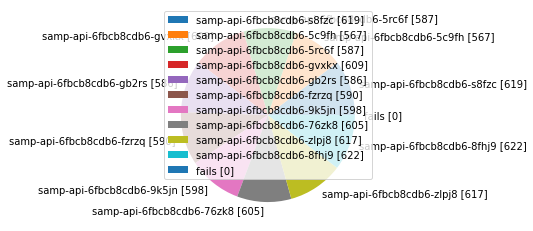

In [32]:
hostnames = list(hostnameMap.keys())
hostnames = [hostname +f" [{hostnameMap[hostname]}]" for hostname in hostnames]
reqs = [hostnameMap[hostname] for hostname in hostnameMap]

hostnames.append(f"fails [{fails}]")
reqs.append(fails)

plt.pie(reqs, labels= hostnames)

plt.legend()
plt.show()
